In [71]:
import pathlib
import pandas as pd
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [72]:
file = pathlib.Path(".") / "submission.csv"
df = pd.read_csv(file)
df

Id                                          Predicted
0  a  631604 4 631617 4 631622 1 637932 7 637945 8 6...
1  b  1249 36 1307 54 1382 64 1482 3 1569 4 1613 2 1...

In [73]:
kind = "test"
first = "a"
index = "b"
img = cv2.imread((pathlib.Path(".") / kind / index / "mask.png").as_posix(), 0)
img.shape

(5454, 6330)

In [74]:
out_img = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8)
predicted = df["Predicted"].loc[0 if index == first else 1]
predicted = list(map(int, predicted.split(" ")))
starts = []
for i in range(0, len(predicted), 2):
    starts.append(i)
    start = predicted[i]
    count = predicted[i + 1]
    x1 = start % img.shape[1]
    y1 = start // img.shape[1]
    # print("start, x1, y1 ", start, x1, y1)
    for i in range(count):
        assert out_img[y1, x1, 0] == 0
        out_img[y1, x1, 0] = 255
        x1 += 1
        if x1 == img.shape[1]:
            y1 += 1
            x1 = 0

assert starts == sorted(starts)

out_img.shape, np.min(out_img), np.max(out_img)

start, x1, y1  1249 1249 0
start, x1, y1  1307 1307 0
start, x1, y1  1382 1382 0
start, x1, y1  1482 1482 0
start, x1, y1  1569 1569 0
start, x1, y1  1613 1613 0
start, x1, y1  1736 1736 0
start, x1, y1  1744 1744 0
start, x1, y1  1787 1787 0
start, x1, y1  1831 1831 0
start, x1, y1  1875 1875 0
start, x1, y1  1918 1918 0
start, x1, y1  1924 1924 0
start, x1, y1  1936 1936 0
start, x1, y1  1962 1962 0
start, x1, y1  1974 1974 0
start, x1, y1  2006 2006 0
start, x1, y1  2049 2049 0
start, x1, y1  2094 2094 0
start, x1, y1  2224 2224 0
start, x1, y1  2239 2239 0
start, x1, y1  2267 2267 0
start, x1, y1  2398 2398 0
start, x1, y1  2415 2415 0
start, x1, y1  2442 2442 0
start, x1, y1  2457 2457 0
start, x1, y1  2531 2531 0
start, x1, y1  2726 2726 0
start, x1, y1  2826 2826 0
start, x1, y1  2922 2922 0
start, x1, y1  2966 2966 0
start, x1, y1  3009 3009 0
start, x1, y1  3027 3027 0
start, x1, y1  3053 3053 0
start, x1, y1  3110 3110 0
start, x1, y1  3184 3184 0
start, x1, y1  3227 3227 0
s

((5454, 6330, 1), 0, 255)

In [75]:
out_img.shape

(5454, 6330, 1)

In [76]:
np.where(out_img[:, :, 0] > 0)[0]

array([   0,    0,    0, ..., 5366, 5366, 5366])

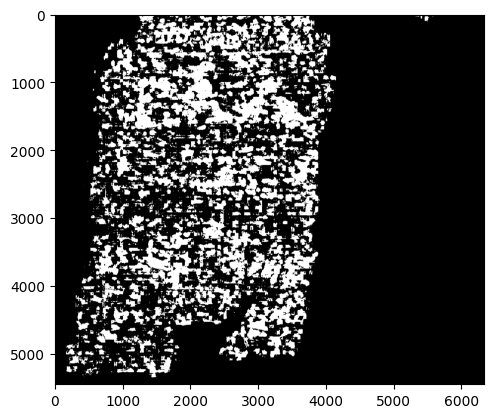

In [77]:
plt.imshow(out_img[:, :, 0], cmap="gray")